# Linear Regression - 

### General Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
df = pd.read_csv('data/products.csv')

df.head()

,F1,F2,F3,F4,F5,Price
0,0.548814,0.715189,0.602763,0.544883,0.423655,17.213492
1,0.645894,0.437587,0.891773,0.963663,0.383442,22.381191
2,0.791725,0.528895,0.568045,0.925597,0.071036,19.379654
3,0.087129,0.020218,0.832620,0.778157,0.870012,14.399690
4,0.978618,0.799159,0.461479,0.780529,0.118274,14.750309


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      200 non-null    float64
 1   F2      200 non-null    float64
 2   F3      200 non-null    float64
 3   F4      200 non-null    float64
 4   F5      200 non-null    float64
 5   Price   200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


### Exploratory Data Analisys (EDA)

In [6]:
# Summary
df.describe()

,F1,F2,F3,F4,F5,Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.488885,0.486995,0.458479,0.508712,0.536536,14.414113
std,0.291367,0.276191,0.291254,0.293803,0.297782,4.995795
min,0.002703,0.000546,0.001383,0.013237,0.004695,1.796467
25%,0.244380,0.263635,0.216220,0.253217,0.284504,10.734376
50%,0.450644,0.456334,0.441150,0.521305,0.525546,14.287728
75%,0.736081,0.706210,0.674524,0.752287,0.813818,17.594242
max,0.997962,0.992011,0.988374,0.994401,0.999809,26.724145


<AxesSubplot:xlabel='Price', ylabel='Count'>

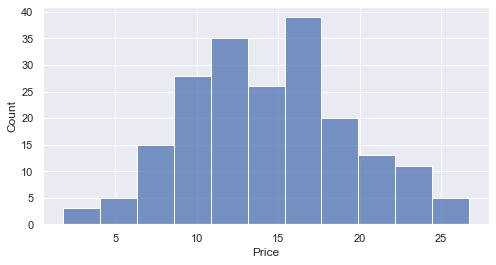

In [9]:
# 'Price' Histogram 
plt.figure(figsize=(8,4))
sns.histplot(df['Price'])

In [12]:
# Correlations
corr = df.corr()
corr

,F1,F2,F3,F4,F5,Price
F1,1.000000,-0.049990,0.084332,0.012651,0.006305,0.299937
F2,-0.049990,1.000000,0.036709,0.161289,0.006885,0.416814
F3,0.084332,0.036709,1.000000,0.052751,0.086721,0.108470
F4,0.012651,0.161289,0.052751,1.000000,-0.025271,0.678587
F5,0.006305,0.006885,0.086721,-0.025271,1.000000,0.263897
Price,0.299937,0.416814,0.108470,0.678587,0.263897,1.000000


<AxesSubplot:>

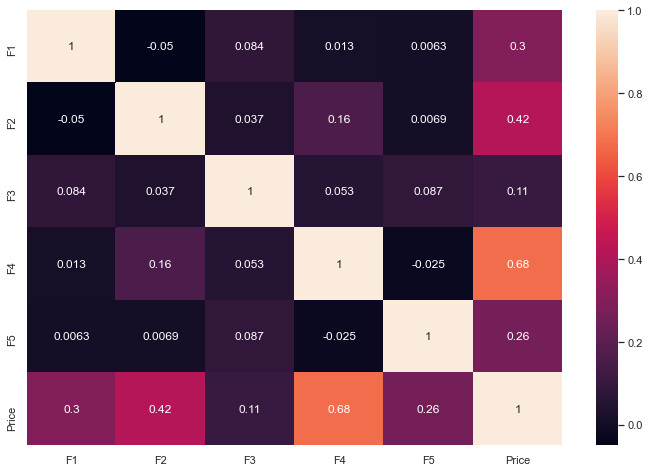

In [13]:
# Visual Data Correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

### Split the Data

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['Price'],axis=1)

y = df['Price']

In [17]:
X.head()

,F1,F2,F3,F4,F5
0,0.548814,0.715189,0.602763,0.544883,0.423655
1,0.645894,0.437587,0.891773,0.963663,0.383442
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,0.461479,0.780529,0.118274


In [18]:
y

0      17.213492
1      22.381191
2      19.379654
3      14.399690
4      14.750309
         ...    
195    10.131478
196    18.447839
197    17.986174
198    10.339007
199    11.089793
Name: Price, Length: 200, dtype: float64

In [118]:
# Split the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()

In [121]:
model.fit(X_train,y_train)

LinearRegression()

In [122]:
predictions = model.predict(X_test)

In [153]:
predctions_df = pd.DataFrame(predictions,columns=['Predicted Price'])

In [154]:
predctions_df.head()

,Predicted Price
0,21.383960
1,6.312029
2,13.956207
3,11.649416
4,17.380874


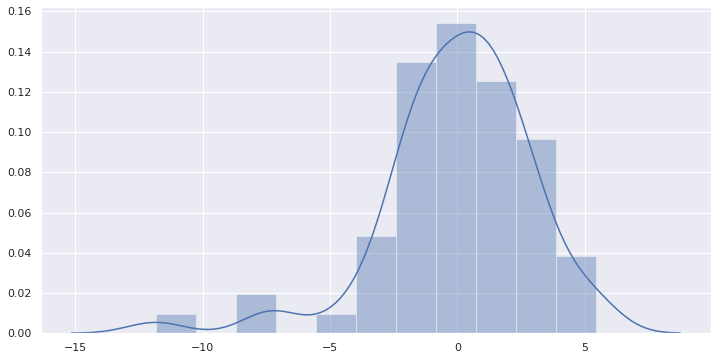

In [176]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions))

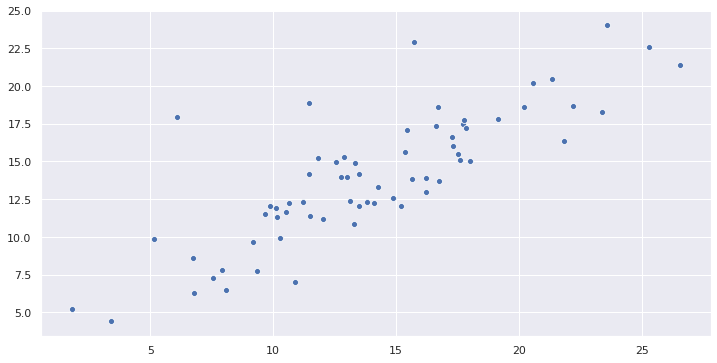

In [174]:
plt.figure(figsize=(12,6))
sns.scatterplot(y_test,predictions)

In [162]:
from sklearn import metrics
import numpy as np

In [163]:
print('The Mean Absolute Error is', metrics.mean_absolute_error(y_test, predictions))

The Mean Absolute Error is 2.112255425550431


In [164]:
print('The Mean Squarred Error is ', metrics.mean_squared_error(y_test, predictions))

The Mean Squarred Error is  8.403284562193225


In [165]:
print('Root Mean Squared Error is ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error is  2.8988419346686056


In [167]:
model.intercept_

0.8026424440195594

In [168]:
coefficient = model.coef_

In [169]:
coefficient

array([ 6.20672915,  6.58283995, -0.68333038,  9.73572121,  5.08290023])

In [171]:
coef_df = pd.DataFrame([coefficient],columns=X.columns)

In [172]:
coef_df

,F1,F2,F3,F4,F5
0,6.206729,6.58284,-0.68333,9.735721,5.0829


 When all factors are held constant,one unit increase in **F1**, will lead to a 6.2 increase in the **price**

Happy coding!